In [12]:
import torch
import requests
import matplotlib.pyplot as plt

In [13]:
# iris data 다운로드
iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
r = requests.get(iris_url)
open('iris.data','wb').write(r.content)

4551

In [14]:
# iris 데이터 로딩하기
vectors = []
answers = []
with open('iris.data','r') as f:
  for line in f:
    if len(line.strip()) != 0:
      items = line.strip().split(",")
      vectors.append([float(i) for i in items[:4]])
      answers.append(items[4])

print(vectors)
print(answers)

[[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], [4.7, 3.2, 1.3, 0.2], [4.6, 3.1, 1.5, 0.2], [5.0, 3.6, 1.4, 0.2], [5.4, 3.9, 1.7, 0.4], [4.6, 3.4, 1.4, 0.3], [5.0, 3.4, 1.5, 0.2], [4.4, 2.9, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.4, 3.7, 1.5, 0.2], [4.8, 3.4, 1.6, 0.2], [4.8, 3.0, 1.4, 0.1], [4.3, 3.0, 1.1, 0.1], [5.8, 4.0, 1.2, 0.2], [5.7, 4.4, 1.5, 0.4], [5.4, 3.9, 1.3, 0.4], [5.1, 3.5, 1.4, 0.3], [5.7, 3.8, 1.7, 0.3], [5.1, 3.8, 1.5, 0.3], [5.4, 3.4, 1.7, 0.2], [5.1, 3.7, 1.5, 0.4], [4.6, 3.6, 1.0, 0.2], [5.1, 3.3, 1.7, 0.5], [4.8, 3.4, 1.9, 0.2], [5.0, 3.0, 1.6, 0.2], [5.0, 3.4, 1.6, 0.4], [5.2, 3.5, 1.5, 0.2], [5.2, 3.4, 1.4, 0.2], [4.7, 3.2, 1.6, 0.2], [4.8, 3.1, 1.6, 0.2], [5.4, 3.4, 1.5, 0.4], [5.2, 4.1, 1.5, 0.1], [5.5, 4.2, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.0, 3.2, 1.2, 0.2], [5.5, 3.5, 1.3, 0.2], [4.9, 3.1, 1.5, 0.1], [4.4, 3.0, 1.3, 0.2], [5.1, 3.4, 1.5, 0.2], [5.0, 3.5, 1.3, 0.3], [4.5, 2.3, 1.3, 0.3], [4.4, 3.2, 1.3, 0.2], [5.0, 3.5, 1.6, 0.6], [5.1, 3.8, 1.9, 0.4], [4.8, 3.0

[[0.3615896999835968, -0.08226887881755829, 0.8565720915794373, 0.3588438928127289], [0.65654057264328, 0.7297117710113525, -0.17576758563518524, -0.07470661401748657], [0.5810589790344238, -0.5964853763580322, -0.07262122631072998, -0.548909604549408], [-0.3017596900463104, 0.31749486923217773, 0.49525272846221924, -0.7502418160438538]]
[4.196675777435303, 0.24062861502170563, 0.07800041139125824, 0.023512763902544975]


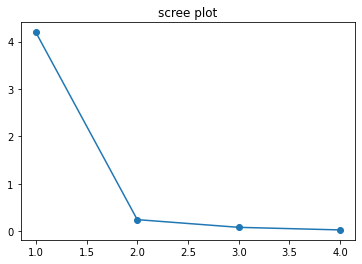

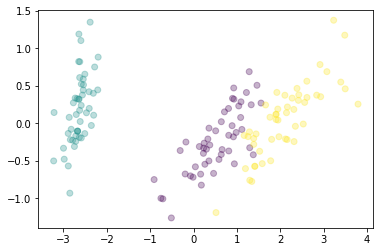

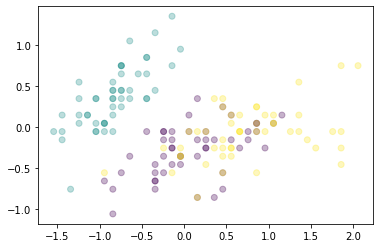

In [23]:
# pytorch로 주성분 찾기(PC)

X = torch.FloatTensor(vectors)
Z = X- X.mean(axis=0) # 중심을 (0,0)으로 이동 # axis =0 == 각 차원의 평균

def findPC(Z):
  w = torch.randn(Z.shape[1])
  w =  w/ ((w ** 2).sum() ** 0.5)

  lr = 0.1

  for epoch in range(1001):
    w.requires_grad_(True)
    variance = ((Z * w).sum(dim=1) ** 2).mean() # dim =1 == axix = 1 각 행의 합

    variance.backward()
    with torch.no_grad():
      w = w + lr * w.grad
      w = w / ((w ** 2).sum() ** 0.5)

  return w, variance.item()

def PCA(Z, n):
  W, V = [], []
  for _ in range(n):
    w, v = findPC(Z)
    W.append(w.tolist())
    V.append(v)
    Z = Z - (Z @ w.unsqueeze(1)) * w # 주성분을 뺀 나머지

  return W, V

def transform(Z, W):
  return Z @ torch.FloatTensor(W).T

W, V = PCA(Z,4)

print(W)
print(V)

plt.title("scree plot")
plt.plot(range(1, len(V)+1), V, 'o-')
plt.show()

K = transform(Z, W)

species = {s:i for i, s in enumerate(set(answers))}

# print([species[a] for a in answers])

plt.scatter(K[:,0], K[:,1], c = [species[a] for a in answers], alpha=0.3)
plt.show()

# 얼마나 잘 분리시켰나 확인하기위해 원본(?) 출력
plt.scatter(Z[:,0], Z[:,1], c = [species[a] for a in answers], alpha=0.3)
plt.show()

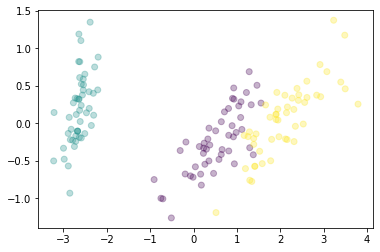

In [6]:
# PCA는 사서 쓰자!
from sklearn import decomposition

pca = decomposition.PCA(2)
pca.fit(X)
T = pca.transform(X)

plt.scatter(T[:,0],T[:,1], c = [species[a] for a in answers], alpha=0.3)
plt.show()